In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset

In [2]:
dataset = load_dataset("lukebarousse/data_jobs")
df = pd.DataFrame(dataset['train'])

In [3]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [4]:
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [10]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [41]:
df_DA_explode = df_DA.explode('job_skills')

In [42]:
df_DA_explode['month_n'] = df_DA_explode['job_posted_date'].dt.month

In [43]:
df_DA_pivot = df_DA_explode.pivot_table(index = 'month_n', columns = 'job_skills', aggfunc='size', fill_value=0)

In [44]:
df_DA_pivot.head()

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
month_n,,,,,,,,,,,,,,,,,,,,,
1,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
2,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
3,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
4,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
5,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18


In [45]:
df_DA_pivot.reset_index(inplace=True)

In [46]:
'month_n' in df_DA_pivot.columns

True

In [47]:
df_DA_pivot['month_l'] = df_DA_pivot['month_n'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B'))

In [48]:
df_DA_pivot.head()

job_skills,month_n,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,...,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom,month_l
0,1,197,17,551,63,2,20,2,1,29,...,228,6,1778,0,11,6,0,9,95,January
1,2,169,2,448,49,0,14,1,4,27,...,202,6,1235,4,2,5,0,4,41,February
2,3,181,4,442,34,0,23,6,1,17,...,194,8,1203,1,1,3,1,5,45,March
3,4,155,4,413,22,0,11,8,9,9,...,185,14,1177,8,2,1,0,6,26,April
4,5,128,8,310,30,0,19,9,2,8,...,122,3,957,3,4,0,0,7,18,May


In [49]:

df_DA_pivot = df_DA_pivot.drop('month_n', axis=1)

In [50]:
df_DA_pivot.set_index('month_l', inplace=True)

In [51]:
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()

In [52]:
df_DA_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
month_l,,,,,,,,,,,,,,,,,,,,,
January,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
February,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
March,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
April,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
May,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
June,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
July,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
August,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
September,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [53]:
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

In [54]:
df_DA_pivot.drop('Total', axis=0, inplace=True)

/var/folders/10/q7cz89bx5qzbm22tqw5z4nvc0000gn/T/ipykernel_6448/3596248543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DA_pivot.drop('Total', axis=0, inplace=True)


In [55]:
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,xamarin,mattermost,gtx,esquisse,chainer,capacitor,nuxt.js,msaccess,ovh,suse
month_l,,,,,,,,,,,,,,,,,,,,,
January,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,0,0,0,0,0,1,1,0,0,0
February,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
March,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,1,0,0,0,0,0,0,0,0,1
April,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,0,0,0,0,1,0
May,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,1,0,0
June,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
July,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
August,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
September,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,1,0,0,0,0,0,0,0,0


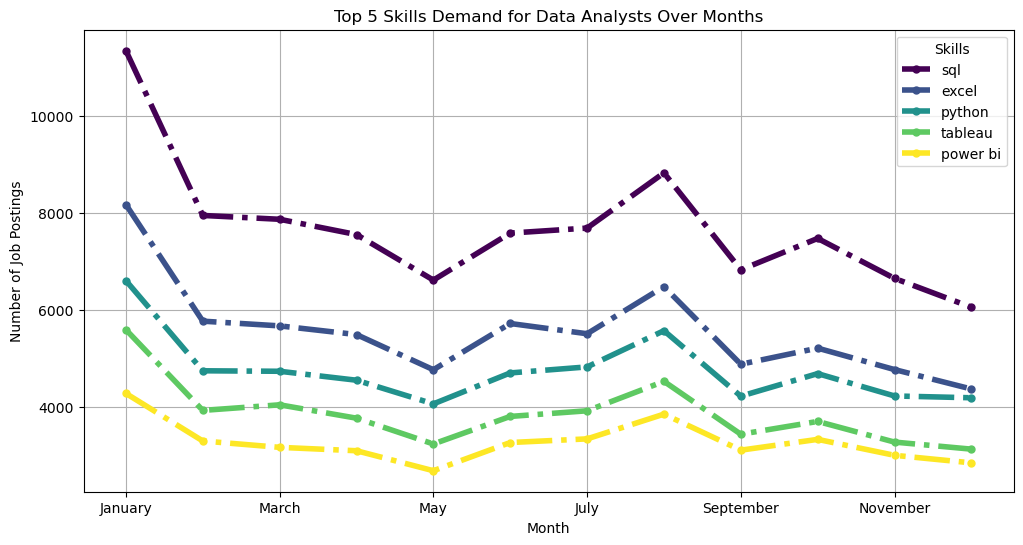

In [70]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle='-.',
    colormap='viridis',
    marker='o',
    markersize=5,
    figsize=(12, 6))
plt.title('Top 5 Skills Demand for Data Analysts Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')
plt.legend(title='Skills')
plt.grid(True)
plt.show()

In [71]:
df_DA_explode.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,month_n
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1


In [77]:
stat_skills = df_DA_explode.groupby('job_skills').agg(
    count_skills = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)

In [78]:
stat_skills = stat_skills.sort_values(by='count_skills', ascending=False).head(20)

In [79]:
stat_skills

,count_skills,median_salary
job_skills,,
sql,92428,92500.000000
excel,66860,84479.000000
python,57190,98500.000000
tableau,46455,95000.000000
power bi,39380,90000.000000
r,29996,92527.500000
sas,27998,90000.000000
powerpoint,13822,85000.000000
word,13562,80000.000000


In [80]:
from adjustText import adjust_text

/var/folders/10/q7cz89bx5qzbm22tqw5z4nvc0000gn/T/ipykernel_6448/3719477425.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tests.append(plt.text(stat_skills['count_skills'][i], stat_skills['median_salary'][i], row))


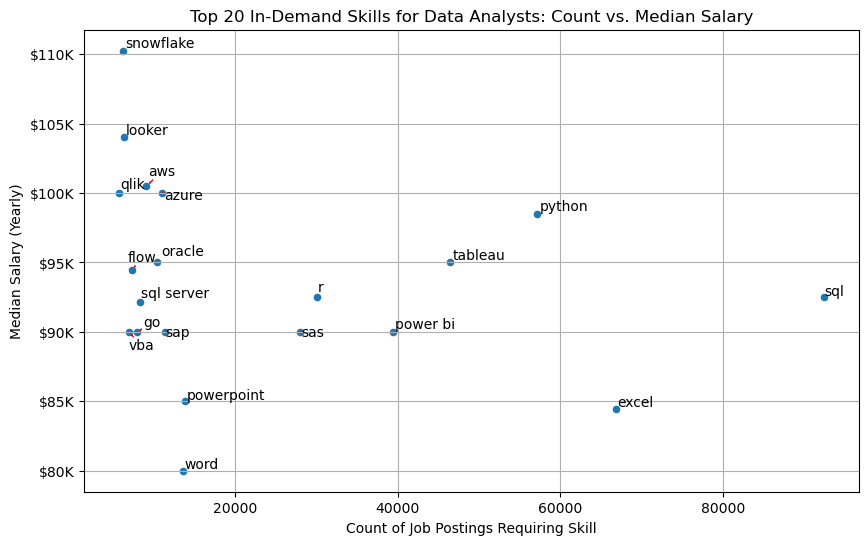

In [85]:
stat_skills.plot(kind = 'scatter', x='count_skills', y='median_salary', figsize=(10,6))

tests = []
for i, row in enumerate(stat_skills.index):
   tests.append(plt.text(stat_skills['count_skills'][i], stat_skills['median_salary'][i], row))
adjust_text(tests, arrowprops=dict(arrowstyle='->', color='red'))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.title('Top 20 In-Demand Skills for Data Analysts: Count vs. Median Salary')
plt.xlabel('Count of Job Postings Requiring Skill')
plt.ylabel('Median Salary (Yearly)')
plt.grid(True)
plt.show()